In [3]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
print("Setup completed")

Setup completed


In [44]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 9216, activation = "relu"))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = "relu"))

# 3rd Fully Connected Layer
model.add(Dense(4096, activation = "relu"))

# Output Layer
model.add(Dense(2, activation = "softmax")) #As we have two classes

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 256)      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="training_set/training_set",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test_set/test_set", target_size=(224,224))

In [47]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("alexnet_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [48]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
10/10 [==============================] - 3s 266ms/step - loss: 4241.3247 - accuracy: 0.5625 - val_loss: 0.6375 - val_accuracy: 0.5344
Epoch 2/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.7249 - accuracy: 0.5625

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/10 [==============================] - 2s 183ms/step - loss: 2.7750 - accuracy: 0.5312 - val_loss: 0.7071 - val_accuracy: 0.4781
Epoch 3/10
10/10 [==============================] - 2s 187ms/step - loss: 0.6989 - accuracy: 0.4938 - val_loss: 0.7025 - val_accuracy: 0.5094
Epoch 4/10
10/10 [==============================] - 2s 185ms/step - loss: 0.6955 - accuracy: 0.4563 - val_loss: 0.6936 - val_accuracy: 0.5031
Epoch 5/10
10/10 [==============================] - 2s 195ms/step - loss: 0.6935 - accuracy: 0.4938 - val_loss: 0.6915 - val_accuracy: 0.5156
Epoch 6/10
10/10 [==============================] - 2s 200ms/step - loss: 0.6929 - accuracy: 0.5219 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 7/10
10/10 [==============================] - 3s 256ms/step - loss: 0.6943 - accuracy: 0.4906 - val_loss: 0.6919 - val_accuracy: 0.5329
Epoch 8/10
10/10 [==============================] - 2s 199ms/step - loss: 0.6922 - accuracy: 0.5312 - val_loss: 0.6951 - val_accuracy: 0.4344
Epoch 9/10
10/10 

KeyError: 'acc'

In [41]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

OSError: Unable to open file (unable to open file: name = 'alexnet_1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

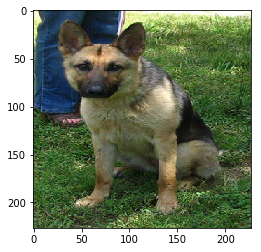

In [42]:
from keras.preprocessing import image
img = image.load_img("../input/dogpic/dog.19.jpg",target_size=(227,227))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("alexnet_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

In [43]:
import os
print(os.listdir('../input/dogpic'))

['dog.19.jpg']
